# Regularização e Gradiente Descendente


## Introdução

Vamos iniciar essa lista com um pequeno tutorial sobre regressão, atributos polinomiais e regularização em uma base de dados bem simples contendo uma coluna de variáveis `x` e um valor `y` associado. A base de dados é chamada de `X_Y_Sinusoid_Data.csv`. 

## Exercício 1

* Importe a base de dados. 
* Gere aproximadamente  100 pontos x na faixa de 0 a 1 utilizando a função `linspace` do `numpy`. Usando esses pontos, calcule o ponto y representando o valor verdadeiro a partir da equação: $y = sin(2\pi x)$

* Plote a base e `x` vs `y` da base e o gerado.


In [31]:
import pandas as pd
import numpy as np

filepath = 'data/X_Y_Sinusoid_Data.csv'
df = pd.read_csv(filepath)

#X_real = ???
#Y_real = ???

In [32]:
df.shape

(20, 2)

In [33]:
df.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [34]:
x,y = np.linspace(0, 1, num=100),np.sin(2*np.pi*np.linspace(0, 1, num=100))
df_gen = pd.DataFrame({'x':x, 'y':y})

In [35]:
df_gen.head()

,x,y
0,0.000000,0.000000
1,0.010101,0.063424
2,0.020202,0.126592
3,0.030303,0.189251
4,0.040404,0.251148


In [36]:
df_a = df.copy()
df_b = df_gen.copy()

df_a.insert(0, 'g', 0)
df_b.insert(0, 'g', 1)

df_t = pd.concat([df_a,df_b], ignore_index=True)

In [37]:
#df_a.drop('g',axis=1,inplace=True)
#df_b.drop('g',axis=1,inplace=True)

In [38]:
df_t.head()

,g,x,y
0,0,0.038571,0.066391
1,0,0.166776,1.027483
2,0,0.183153,1.245302
3,0,0.187359,1.004781
4,0,0.243116,1.264121


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

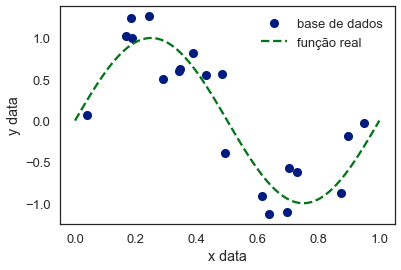

In [40]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = df.set_index('x')['y'].plot(ls='', marker='o', label='base de dados')
ax.plot(df_gen['x'], df_gen['y'], ls='--', marker='', label='função real')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');

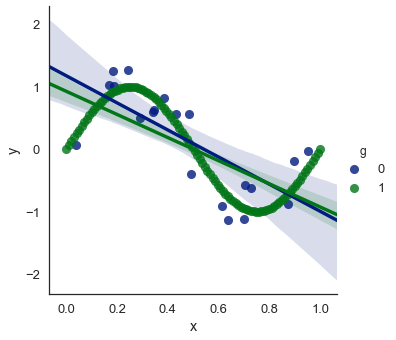

In [41]:
#Plot data and regression model fits across a FacetGrid
sns.lmplot(x="x", y="y", hue="g", data=df_t);

## Exercício 2


* Usando a classe `PolynomialFeatures` da biblioteca de pré-processamento do Scikit-learn's, crie atributos polinomiais de ordem 20.
* Crie um modelo de regressão linear. 
* Plote o valor predito com o valor calculado.

Note que `PolynomialFeatures` requer um dataframe com 1 coluna ou uma array bidimensional de dimensão (`n`, 1), com `n` sendo o número de amostras.

In [107]:
X_train = data_f[:20]
y_train = data_f['y'][:20]
X_real  = data_f[20:]
y_real  = data_f['y'][20:]

In [111]:
X_train.head()

,g,x,y
0,0,0.038571,0.066391
1,0,0.166776,1.027483
2,0,0.183153,1.245302
3,0,0.187359,1.004781
4,0,0.243116,1.264121


In [109]:
X_train.loc[:, X_train.columns != 'y']

,g,x
0,0,0.038571
1,0,0.166776
2,0,0.183153
3,0,0.187359
4,0,0.243116
5,0,0.289299
6,0,0.342805
7,0,0.345499
8,0,0.386477
9,0,0.430047


In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extraindo x e y da base de dados no formato correto
X_data = X_train
Y_data = y_train

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr.fit(X_poly,Y_data)
Y_pred = lr.predict(X_test)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='base de dados', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='função real')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predições com atributos polinomiais')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

ValueError: shapes (100,3) and (1771,) not aligned: 3 (dim 1) != 1771 (dim 0)

## Exercício 3

* Repita o experimento anterior utilizando ridge regression ($\alpha$=0.001) e lasso regression ($\alpha$=0.0001). 
* Plote os resultados.
* Em seguida vamos plotar a magnitude dos coefientes dos modelos para comparação.

O que a diferença entre as magnitudes te diz sobre a regularização?

In [33]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# Crie o modelo Ridge
rr = ???
rr.fit(???)
Y_pred_rr = ???

# Crie o modelo Lasso
lassor = ???
lassor.fit(???)
Y_pred_lr = ???

# Vamos plotar as predições
plt.plot(X_data, Y_data, marker='o', ls='', label='base de dados')
plt.plot(X_real, Y_real, ls='--', label='função real')
plt.plot(X_data, Y_pred, label='regressão linear', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='regressão ridge', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='regressão lasso', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [34]:
# Vamos examinar os coeficientes gerados pelos modelos
# .ravel() retorna uma array multidimensional concatenada em uma dimensão (flattened)

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Diferença enorme da escala da regressão linear e das regularizações

In [35]:
colors = sns.color_palette()

# Vamos criar dois eixos, um para regressão linear outro para as regularizações
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plotar a regressão linear
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plotar as regularizações no outro eixo
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Alterar as escalas
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combinar as legendas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

## Exercício 4

Para os próximos exercícios vamos utilizar a base de dados da atividade anterior sobre o preço dos imóveis.

Para começar:

* Importe os dados com Pandas e aplique o one-hot-encoding nas variáveis categóricas, vamos utilizar o método `.get_dummies`. 
* Divida a base entre treino e teste. 
* Aplique a função de transformação Log nos atributos com viés. 

In [5]:
filepath = 'data/Ames_Housing_Sales.csv'
data1 = pd.read_csv(filepath, sep=',')
data = data1.dropna()

Crie uma lista de atributos categóricos e aplique o método `get_dummies` para gerar os atributos one-hot-encoding.

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Primeiro devemos marcar cada coluna como categórico com pd.Categorical()
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Agora aplicamos o método get_dummies() nas nossas colunas categóricas
data = pd.get_dummies(data, columns=???)

Agora, vamos dividir a base entre treino e teste, use `test_size=0.3` e `random_state=42`:

In [37]:
from sklearn.model_selection import train_test_split

train, test = ???

Alguns atributos possuem valores enviesados--uma transformação log pode ajudar a aliviar essa situação. Vamos alterar esses atributos, exceto pelo `SalePrice` que é nossa variável alvo.

In [38]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

In [ ]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

In [39]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better

In [40]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    # aplique a função np.log1p nessa variável
    train[col] = ???
    test[col]  = ???

Vamos separar os atributos do preditor

In [ ]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = ???
y_train = ???

X_test  = ???
y_test  = ???

## Exercício 5

* Escreva a função **`rmse`**  que recebe valores reais da variável alvo e os peditos pelo modelo e retorna a raiz quadrada do erro quadrático médio. Use a função `mean_squared_error` do sklearn.  


In [41]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue, ypredicted):
    return ???

* Aplique um modelo básico de regressão linear
* imprima o rmse do modelo
* plot os valores preditos vs reais baseado no modelo.  

In [42]:
from sklearn.linear_model import LinearRegression

linearRegression = ???

linearRegression_rmse = rmse(???)

print(linearRegression_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Exercício 6

A regressão Ridge usa a regularização do tipo L2 para reduzir a magnitude dos coeficientes. Isso é especialmente útil quando temos uma variância muito alta. O Scikit-Learn possui esse modelo na classe `Ridge` e uma versão que aplica validação cruzada para determinar o melhor valor de $\alpha$ na classe `RidgeCV`.

* Utilize a classe `Ridge` e determine o melhor valor de $\alpha$ dentre os valores $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ e plote o RMSE vs $\alpha$.

In [ ]:
from sklearn.linear_model import Ridge



Agora repita o experimento utilizando RidgeCV, note que esse modelo retorna apenas o melhor $\alpha$:


In [43]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(???)

ridgeCV_rmse = rmse(???)

print(ridgeCV.alpha_, ridgeCV_rmse)

## Exercício 7

Agora utilizaremos o `LassoCV` para aplicar a regularização L1 que tenta reduzir o máximo de coeficientes para zero, fazendo uma espécie de seleção de atributos.

Além disso, temos a classe `ElasticNetCV` que combina as regularizações L1 e L2.

* Use o `LassoCV` e determine o $\alpha$ ótimo e o RMSE do modelo gerado. 
* Repita com o modelo Elastic Net
* Compare os resultados com tabelas ou plotagens

Use os $\alpha$:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [44]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(???)

lassoCV_rmse = rmse(???)

print(lassoCV.alpha_, lassoCV_rmse) 

Vamos verificar quantos coeficientes são iguais a zero:

In [ ]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Agora teste o elastic net com os mesmos alphas de Lasso e l1_ratios entre 0.1 e 0.9

In [45]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(???)
elasticNetCV_rmse = rmse(???)

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

Vamos comparar os resultados com uma tabela:

In [46]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(???, index=???).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

Alternativamente podemos fazer um plot do valor real vs predito para cada modelo.

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');